# Project: Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will investigate the TMDb movie dataset which has been downloaded from Kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including parameters such as user ratings, cast, genre, revenue etc.

In this analysis report we shall try to answer two questions which are 
>1) Which genre is the most popular amongst viewers? Do the most popular genres have high profit margins as well?

>2) Do highly acclaimed movies(movies with high viewer ratings) have high profits as well?

Although there are many parameters available to us, in order to answer the above posed questions, we shall be making use of the following parameters:
>`genres` , `budget_adj`, `revenue_adj`, `vote_average`, and `popularity`. We shall also make use of `profit_adj` which is a dependant variable calculated as the difference between the adjusted revenue and adjusted budget.

Our analysis workflow will be to first go over the dataset, understand its structure, clean the data if necessary and then finally provide insights using Exploratory Data Analysis and draw conclusions.

### Setting up the environment
> First, we shall begin by loading all the libraries necessary to help us perform this analysis

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section we shall load the data and then explore the data to understand its features and also find descripancies, if any. We shall then try to clean the data and prepare it for analysis


### 1. Loading and understanding the data
> We shall now load the data from a .csv file to a pandas dataframe and use features of pandas to understand the data better

In [185]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [186]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> As we can see above, there are 10866 data points available to us for analysis. There are several columns which are not of relevance to us, like the overview, homepage, imdb_id etc. Also, there is some missing data which needs to be dealt with in columns like the genres, cast, director etc. We also need to extract useful information from certain columns, like ‘cast’ and ‘genres’, which contain multiple values separated by pipe (|) characters.

### 2. Data Cleaning 

> Based on our understanding of the dataset, we shall perform the following substeps to clean our data and make it ready for exploratory data analysis

#### 2.1 Remove the unnecessary columns from our dataset
> We shall remove the following columns from the dataset: ***id, imdb_id, homepage, overview, keywords, tagline***. These columns do not contain any relevant information which might be useful for our analysis.

>**Note: The data being dropped is deemed irrelevant for our analysis only. It does not highlight the significance of the data in its true sense.**

In [188]:
df.drop(columns = ['id', 'imdb_id', 'homepage','overview','keywords','tagline','production_companies'], inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


#### 2.2 Remove the rows with unavailable data from our dataset
> We shall remove the rows with no data available in our dataset using the **dropna()** function. A point to be noted here is that the columns with missing data are non numeric and thus we cannot make use of computations to fill the missing values with our assumptions

In [190]:
df.dropna(inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


#### 2.3 Handle the data separated with special characters
> We shall now convert the data in columns ***genres*** and ***cast*** which is separated by '|' into lists using the **apply()** function

In [191]:
df['genres'] = df['genres'].apply(lambda x : [i.strip() for i in x.split('|')])
df['cast'] = df['cast'].apply(lambda x: [i.strip() for i in x.split('|')])
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.5+ MB


> As we can see above, our data is now clean and ready to be analyzed. The final data has 10732 data points

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have cleaned our data, we can move to performing exploratory data analysis on it. We shall do that by answering few of the questions mentioned below

### Research Question 1
> **Which genre is the most popular amongst viewers? Do the most popular genres have high profit margins as well?**

In [192]:
# First we extract the unique genres from the dataset using the following code
unique_genres = list(set(x for l in list(df['genres']) for x in l))
len(unique_genres)

20

>Looks like there are 20 genres which are available in our dataset. Next we need to find the average rating of movies under each genre.

In [193]:
unique_genres_popularity = [df[df['genres'].apply(lambda x: i in x)]['popularity'].mean() for i in unique_genres]

> First let us sort the popularity in descending order to visualize the plot better

In [194]:
ind = np.array(unique_genres_popularity).argsort()[::-1]
unique_genres = np.array(unique_genres)[ind]
unique_genres_popularity = np.array(unique_genres_popularity)[ind]

> Now let us plot the popularity of the unique genres to see which genre is most favoured by the public

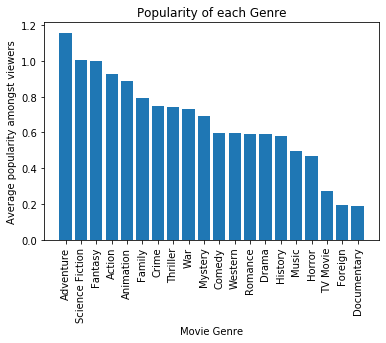

In [195]:
plt.bar(unique_genres,unique_genres_popularity);
plt.xticks(rotation=90)
plt.ylabel('Average popularity amongst viewers')
plt.xlabel('Movie Genre')
plt.title('Popularity of each Genre');

> Now let us look at which movie genres were the most profitable. To calculate the profit, let us first create another column which computes the difference between the adjusted revenue - adjusted budgets.

In [196]:
df['profit_adj'] = df['revenue_adj']-df['budget_adj']
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


>Now we can compute the profit margins vs movie genres using the following code

In [197]:
unique_genres_profits = [df[df['genres'].apply(lambda x: i in x)]['profit_adj'].mean() for i in unique_genres]

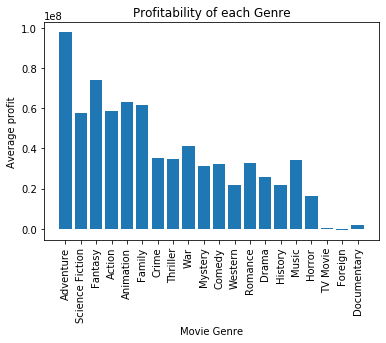

In [198]:
plt.bar(unique_genres,unique_genres_profits);
plt.xticks(rotation=90)
plt.ylabel('Average profit')
plt.xlabel('Movie Genre')
plt.title('Profitability of each Genre');

### Research Question 2
>**Do highly acclaimed movies have high profits as well?**

Text(0.5, 1.0, 'Movie profits vs Average viewer rating')

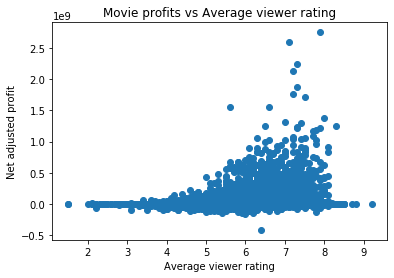

In [199]:
plt.scatter(df['vote_average'],df['profit_adj']);
plt.xlabel('Average viewer rating')
plt.ylabel('Net adjusted profit')
plt.title('Movie profits vs Average viewer rating')

> The graph is a bit difficult to understand due to the presence of outliers. Let us get rid of the outliers and calculate the pearsons coefficient and also plot the regression line to understand the correlation better.

>First let us remove the outliers present in the data. It looks like most of the movies have earned less than 1B dollars. Let us confirm this by making use of the percentile function in numpy

In [182]:
np.percentile(df['profit_adj'],99)

592275153.3610153

In [169]:
df[df['profit_adj']>np.percentile(df['profit_adj'],99)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 10758
Data columns (total 15 columns):
popularity        108 non-null float64
budget            108 non-null int64
revenue           108 non-null int64
original_title    108 non-null object
cast              108 non-null object
director          108 non-null object
runtime           108 non-null int64
genres            108 non-null object
release_date      108 non-null object
vote_count        108 non-null int64
vote_average      108 non-null float64
release_year      108 non-null int64
budget_adj        108 non-null float64
revenue_adj       108 non-null float64
profit_adj        108 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 13.5+ KB


>It can be seen that the 99th percentile has only 0.5B in profits and only over a 108 movies are above the 99th percentile. Let us now filter out those values for our analysis

In [178]:
df_99 = df[df['profit_adj']<np.percentile(df['profit_adj'],99)]

> Now let us import the library **scipy** which is useful in statistical computations. Let us calculate the correlation coefficient using this library

In [179]:
import scipy
r,_ = scipy.stats.pearsonr(df_99['vote_average'],df_99['profit_adj'])
print(r)

0.19330388859268083


>Next let us compute the regression line which can be printed on the scatterplot

In [180]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_99['vote_average'],df_99['profit_adj'])
regression_line = slope*df_99['vote_average']+intercept

>Let us now plot the scatter plot with the regression line

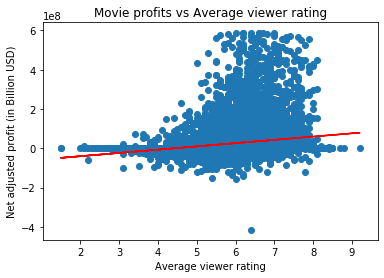

In [181]:
plt.plot(df_99['vote_average'], regression_line, 'r');
plt.scatter(df_99['vote_average'],df_99['profit_adj']);
plt.xlabel('Average viewer rating');
plt.ylabel('Net adjusted profit');
plt.title('Movie profits vs Average viewer rating');

<a id='conclusions'></a>
## Conclusions

>So as we saw from our first finding, ***Adventure*** was the most popular genre amongst viewers and it also happens to earn the most amount of money at the boxoffice. ***Science fiction*** was also popular amongst viewers and ranked 2nd, very close to ***Fantasy*** which ranked 3rd in terms of popularity. But interestingly, ***Fantasy*** earned more money than ***Science fiction*** did by a good margin.

>From our 2nd analysis, we learnt that ***viewer ratings*** and ***net adjusted profits*** were positively correlated, but by a very small number. This observation is strengthened by the regression line seen over the scatter plot as well. We can observe from the plot that most movies with high net profits had a good viewer rating, but there are a lot of movies with good ratings but poor adjusted profits.
#### Limitations
> In our first conclusion, we have categorized the movie genres based on their popularity and profitability, but we do not have a defined measure of popularity and how it was obtained. Also, movies from the year 1960 have been added to the database and we do not know if measure of popularity has been constant throughout time and if the resources were available during the time to do so.

> In our second conclusion, we have tried to relate the viewer ratings with the net adjusted profitability. Similar to populairity, viewer ratings is also vague in terms of definition and also its coherence over time. Also, even after considering 99th percentile of profitability, we still have outliers which make the data skewed and difficult to draw conclusions. 